实际中的数据不可能直接用直线就能将其分割开，即决策边界在大多情况下不是直线，不是线性的。   
所以，同线性回归添加新的特征（高阶项）来拟合非线性数据一样，      
在这里，需要添加新的特征（增加高阶项）以满足要求。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(666)
X = np.random.normal(0, 1, size = (200, 2))
y = np.array(X[:,0]**2 + X[:,1]**2 >= 1.5, dtype = 'int')
X.shape

(200, 2)

In [2]:
y.shape

(200,)

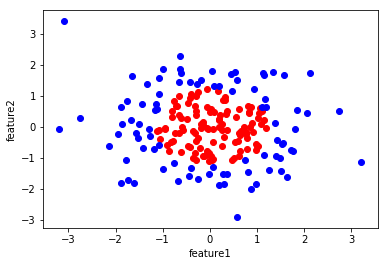

In [3]:
# 样本可视化
plt.scatter(X[y==0, 0], X[y==0, 1], color = 'r')
plt.scatter(X[y==1, 0], X[y==1, 1], color = 'b')
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.show()

# 一, 用逻辑回归对数据分类

In [4]:
from ML.LogisticRegression import LogisticRegression
from ML.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
logisticReg = LogisticRegression()
logisticReg.fit(X_train, y_train)
logisticReg.score(X_test,y_test)

0.55

可以看到，利用逻辑回归对上述数据进行分类，预测的准确率很低   
因为，显而易见，上述图形的决策边界应该为一个圆形，是二阶的， 而逻辑回归的决策边界是线性的，显然不符合要求。

可视化上述模型的决策边界

/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


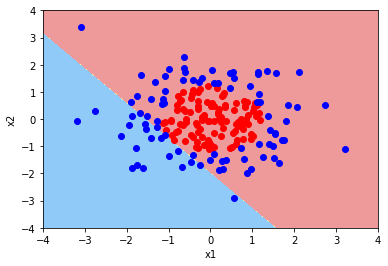

In [5]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)),
        np.linspace(axis[3], axis[2], int((axis[3]-axis[2])*100))
    )
    x_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(x_new)
    ss = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, ss, linewidth=5, cmap=custom_cmap)
    
plot_decision_boundary(logisticReg, axis = [-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1], color = 'r')
plt.scatter(X[y==1, 0], X[y==1, 1], color = 'b')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

从上图可以看出，这是一个非常糟糕的分类模型

# 二，用多项式逻辑回归对数据分类

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


def ploy_logisticReg(degree):
    return Pipeline([("poly", PolynomialFeatures(degree=degree)),
                           ("std_scaler", StandardScaler()),
                          ("lin_reg", LogisticRegression())
                    ])



注意：上述的LogisticRegression 类是我们自己写的，但是仍可以传入管道中，因为我们编写类时是完全按照sklearn
的便准进行的，故可以和sklearn中的pipeline 无缝衔接。

In [7]:
ployLogisticReg = ploy_logisticReg(degree = 2)
ployLogisticReg.fit(X_train, y_train)
ployLogisticReg.score(X_test, y_test)

0.925

逻辑回归加入二项式后预测的准确率是不是高了很多。     
下面，来看一下ployLogisticRegr 模型的决策边界。

/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


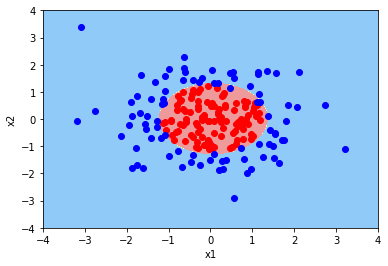

In [8]:
plot_decision_boundary(ployLogisticReg, axis = [-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1], color = 'r')
plt.scatter(X[y==1, 0], X[y==1, 1], color = 'b')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

这样是不是很完美呢？

当然，是集中的数据不可能这样规则,即不可能决策边界正好是一个圆形，二阶的。   
所以，在实际中, 往往我们需要调试degree, 以使得到较高的准确率。

在本例子中,由于我们假设的数据就是以一个圆形为决策边界,所以 degree=2 为最佳的,若degree>2,就会出现过拟合。   
下面，我们用可视化的方法来展示一下。

In [10]:
ployLogisticReg1 = ploy_logisticReg(degree = 10)
ployLogisticReg1.fit(X_train, y_train)
ployLogisticReg1.score(X_test, y_test)

0.925

/home/crystal/anaconda3Project/ML/LogisticRegression.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-t))
/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


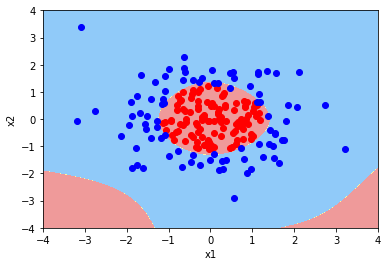

In [11]:
plot_decision_boundary(ployLogisticReg1, axis = [-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1], color = 'r')
plt.scatter(X[y==1, 0], X[y==1, 1], color = 'b')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

虽然预测的准确率没变, 但是根据决策边界,可以看出，明显过拟合。   
当再来新的数据时,不一定能以较高的准确率来预测数据。

另外，为了防止过拟合，模型正则化也是一个不错的选择。